In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

import warnings
warnings.filterwarnings('ignore')

In [2]:
from forecasting_models.univariate_models.arima.model import ARIMAForecastModel
from forecasting_models.univariate_models.lstm.model import LSTMForecastModel
from data_utils.csv_utils import read_timeseries_csv

In [3]:
dataset = read_timeseries_csv("./examples/sample_data/univar_data/cpu_example_5min.csv")

dataset.shape

(4032, 1)

In [4]:
enable_plotting = True
n_splits = 3

In [5]:
lstm_model = LSTMForecastModel("./examples/configs/lstm/lstm_example_12_step.yaml")

** FOLD n.1 **
Training dataset plot:


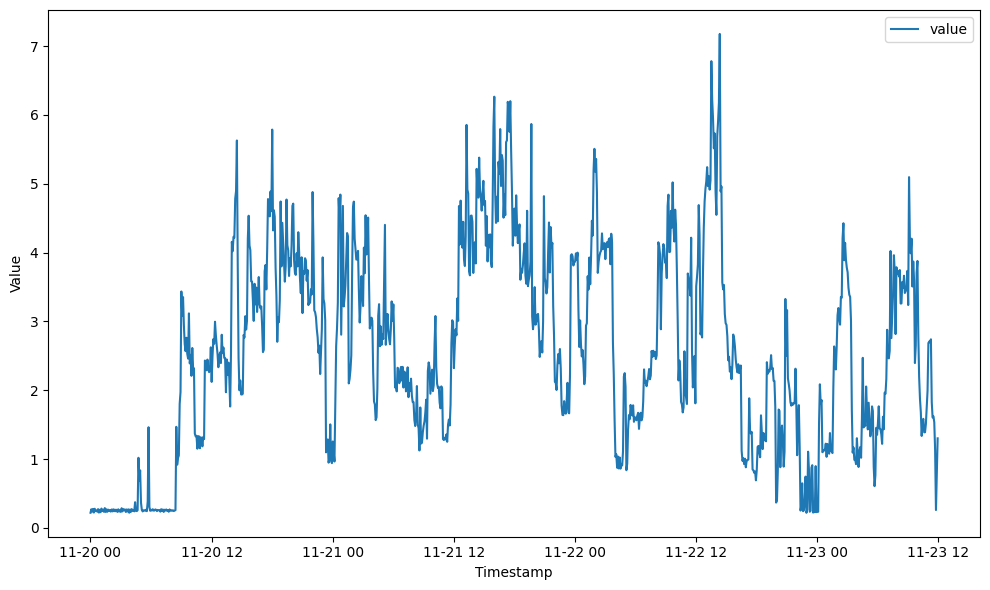

Fold n.1 evaluation result plot:


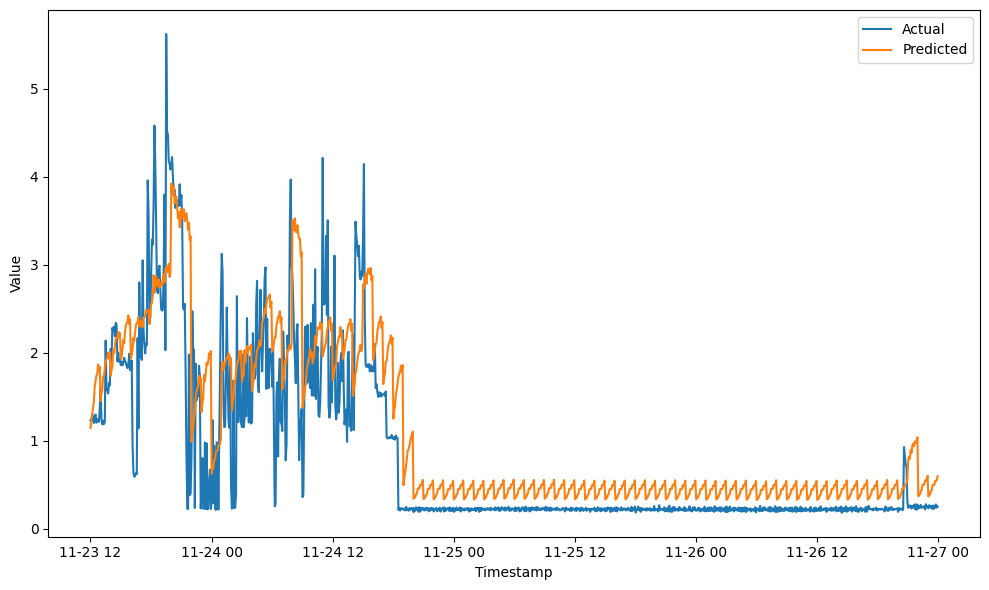

-----------------------------------------

** FOLD n.2 **
Training dataset plot:


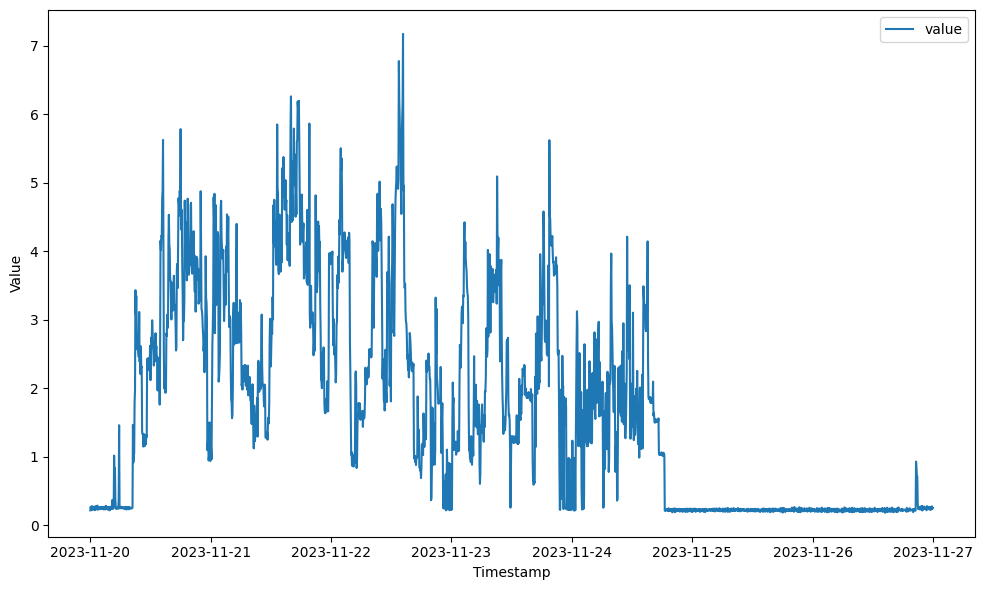

Fold n.2 evaluation result plot:


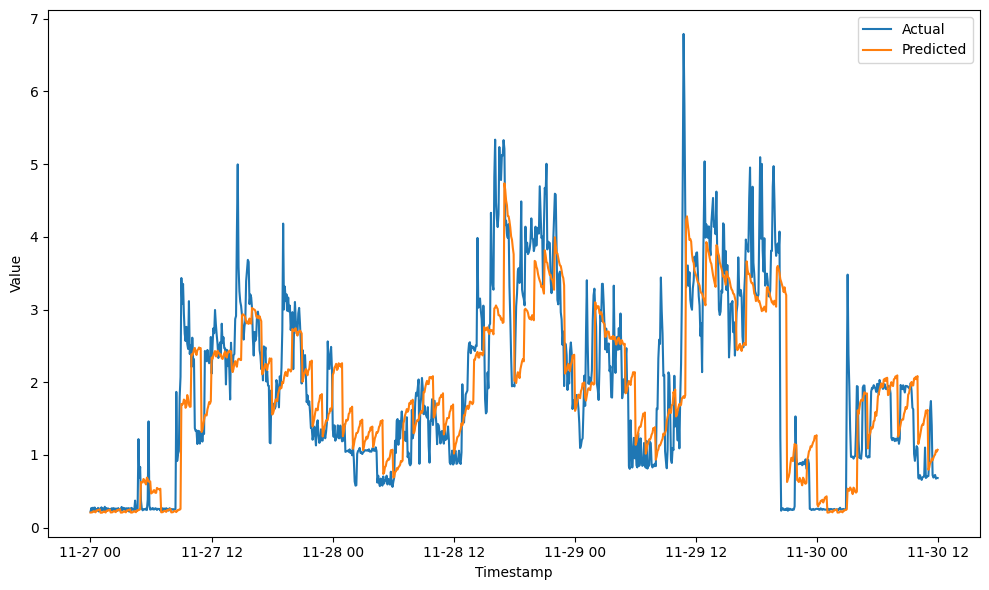

-----------------------------------------

** FOLD n.3 **
Training dataset plot:


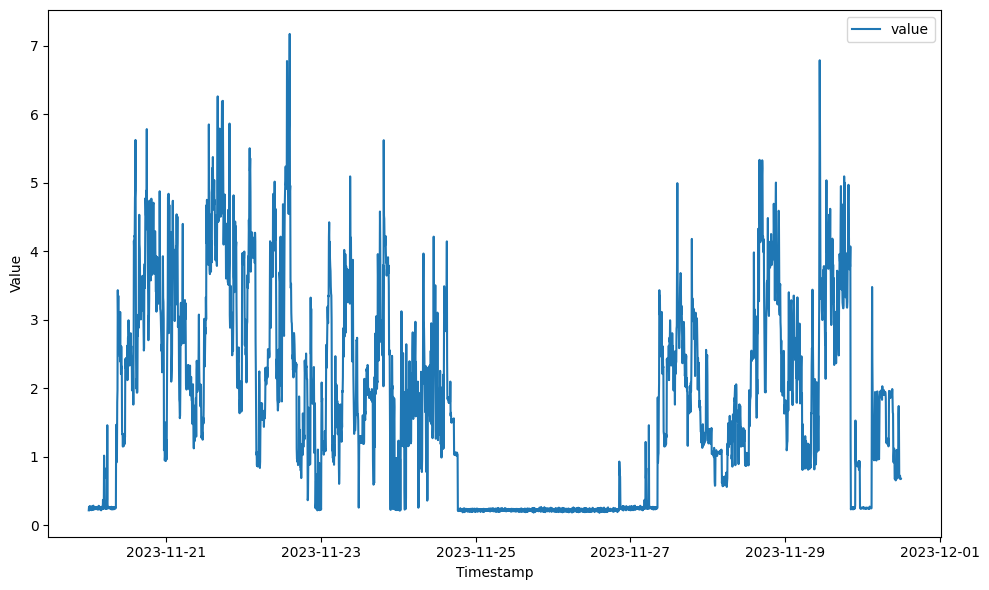

Fold n.3 evaluation result plot:


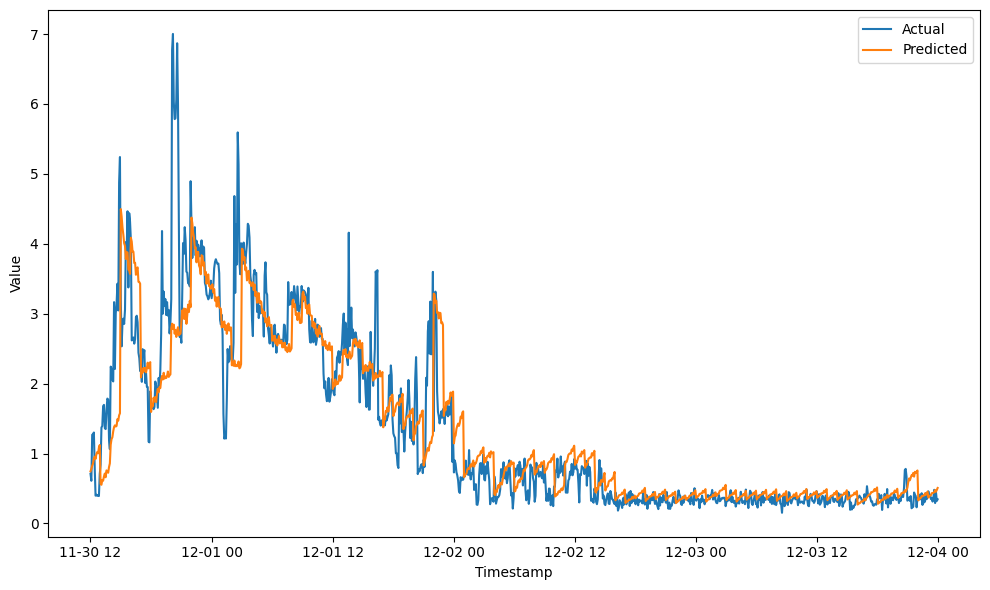

-----------------------------------------



In [6]:
from tensorflow.keras.layers import LSTM
from ts_cross_validation import lstm_eval_ts_cross_validation

lstm_evals_df = lstm_eval_ts_cross_validation(
    lstm_model,
    dataset.copy(),
    custom_inner_layers=[
        LSTM(64),
    ],
    enable_plotting=enable_plotting,
    n_splits=n_splits,
)

In [7]:
lstm_evals_df

,rmse,mse,mape,mae,r2
Fold 1,0.597874,0.357454,98.614312,0.412101,0.626895
Fold 2,0.752052,0.565583,44.364422,0.518886,0.647063
Fold 3,0.614200,0.377242,35.103749,0.340059,0.775487


** FOLD n.1 **
Training dataset plot:


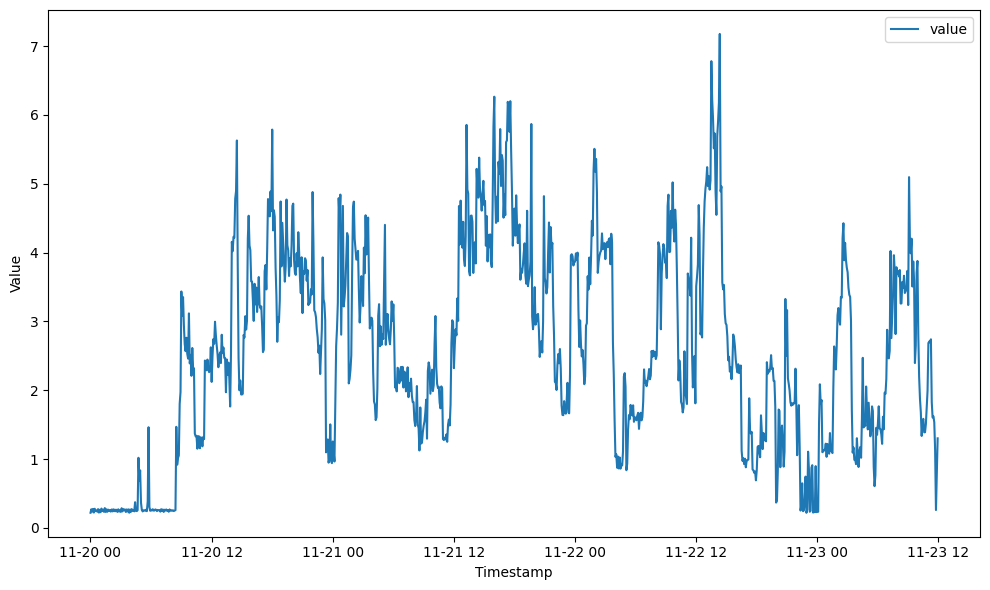

Fold n.1 evaluation result plot:


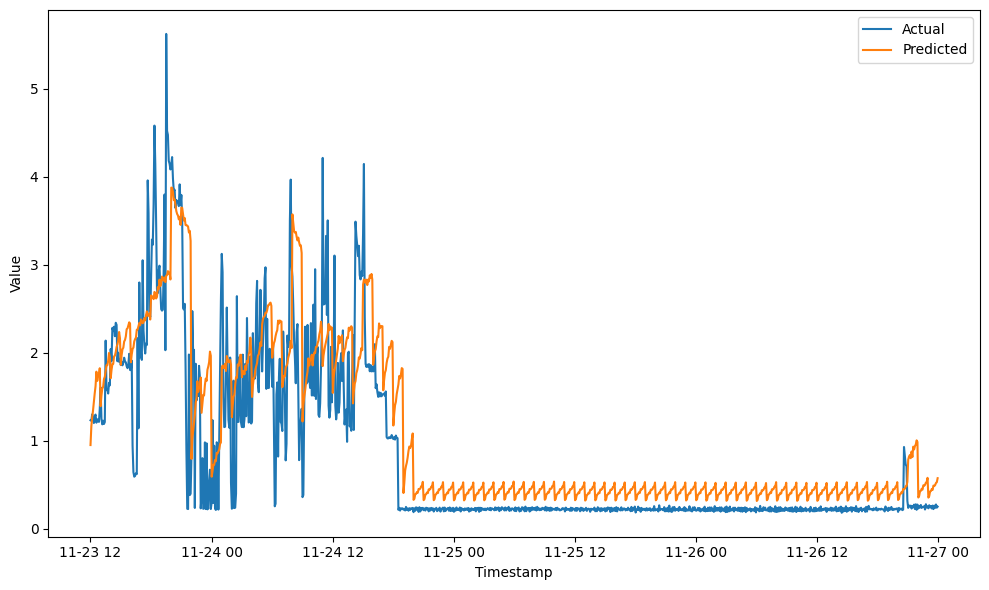

-----------------------------------------

** FOLD n.2 **
Training dataset plot:


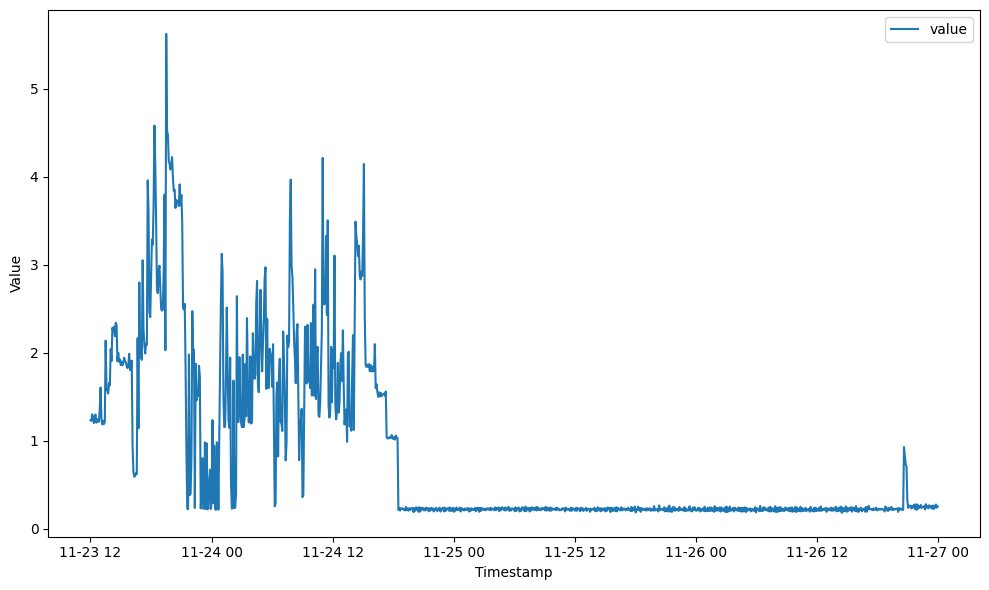

Fold n.2 evaluation result plot:


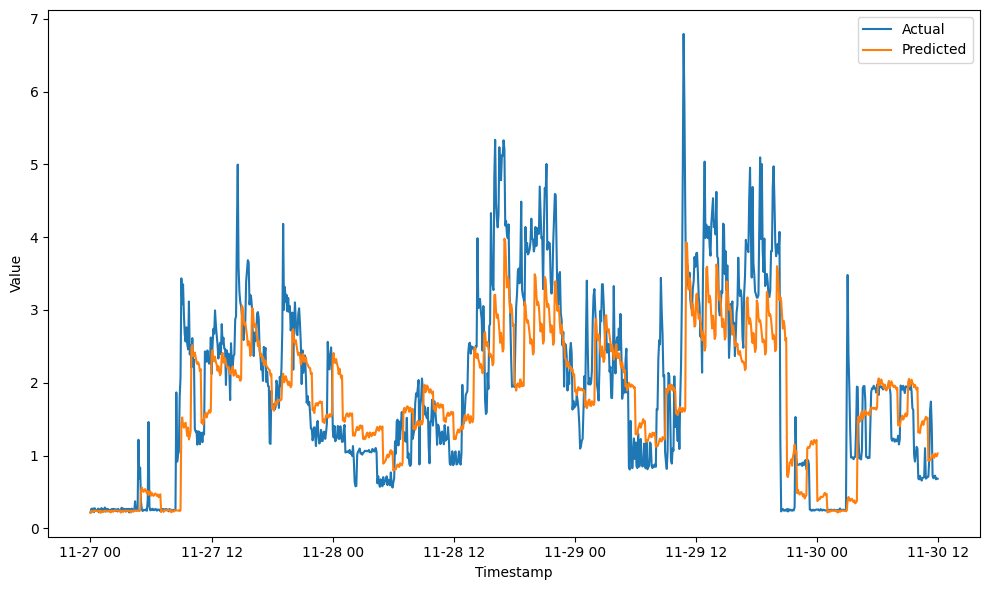

-----------------------------------------

** FOLD n.3 **
Training dataset plot:


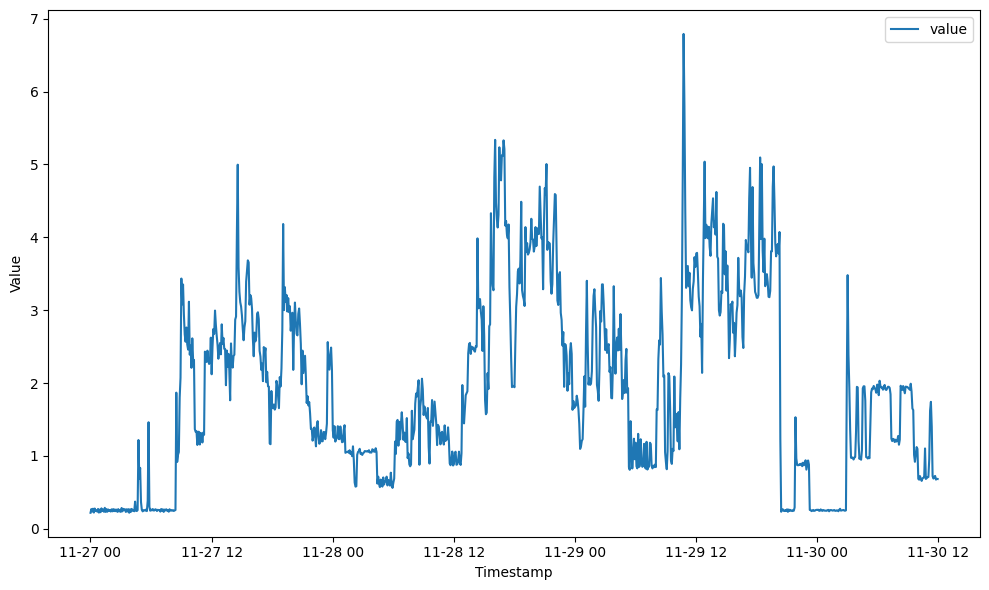

Fold n.3 evaluation result plot:


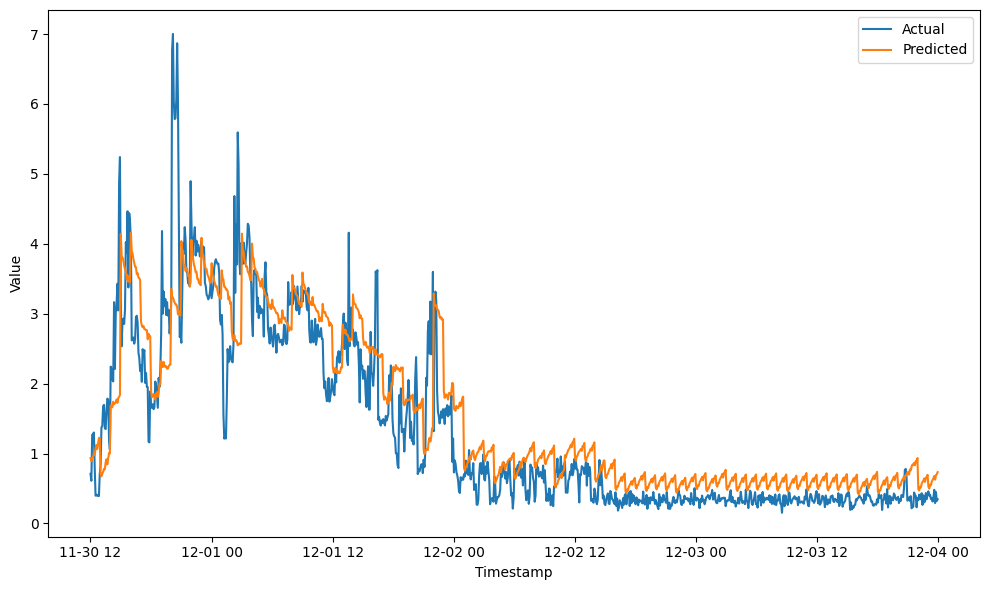

-----------------------------------------



In [8]:
from ts_cross_validation import lstm_eval_rolling_ts_cross_validation


lstm_rolling_evals_df = lstm_eval_rolling_ts_cross_validation(
    lstm_model,
    dataset.copy(),
    custom_inner_layers=[
        LSTM(64),
    ],
    enable_plotting=enable_plotting,
    n_splits=n_splits,
)

In [9]:
lstm_rolling_evals_df

,rmse,mse,mape,mae,r2
Fold 1,0.583724,0.340734,93.843003,0.396900,0.644347
Fold 2,0.809558,0.655383,44.148446,0.572537,0.591025
Fold 3,0.637626,0.406567,60.099323,0.440991,0.758035


In [10]:
arima_model = ARIMAForecastModel("./examples/configs/arima/arima_example_12_step.yaml")

** FOLD n.1 **
Training dataset plot:


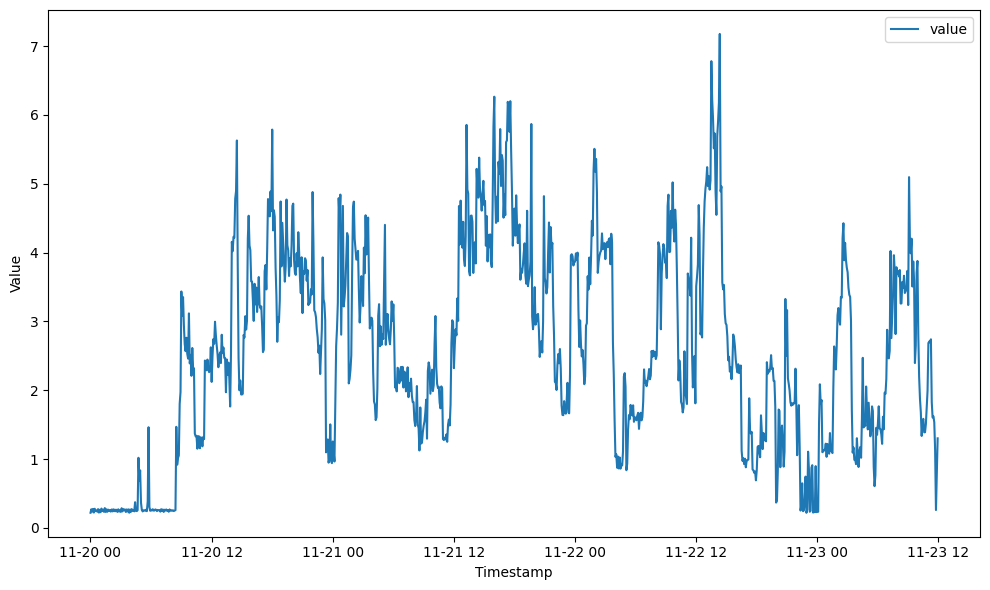

Fold n.1 evaluation result plot:


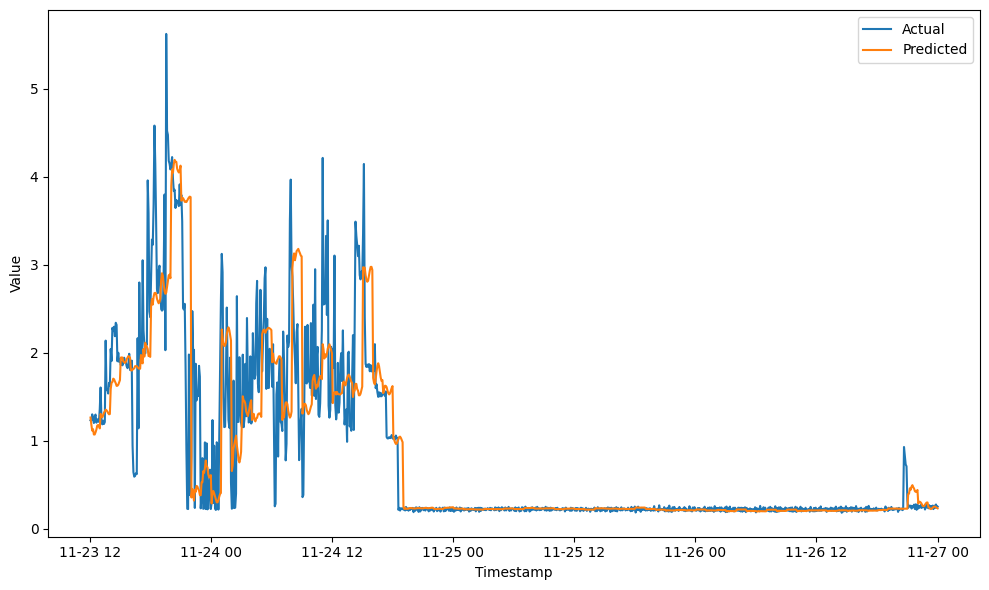

-----------------------------------------

** FOLD n.2 **
Training dataset plot:


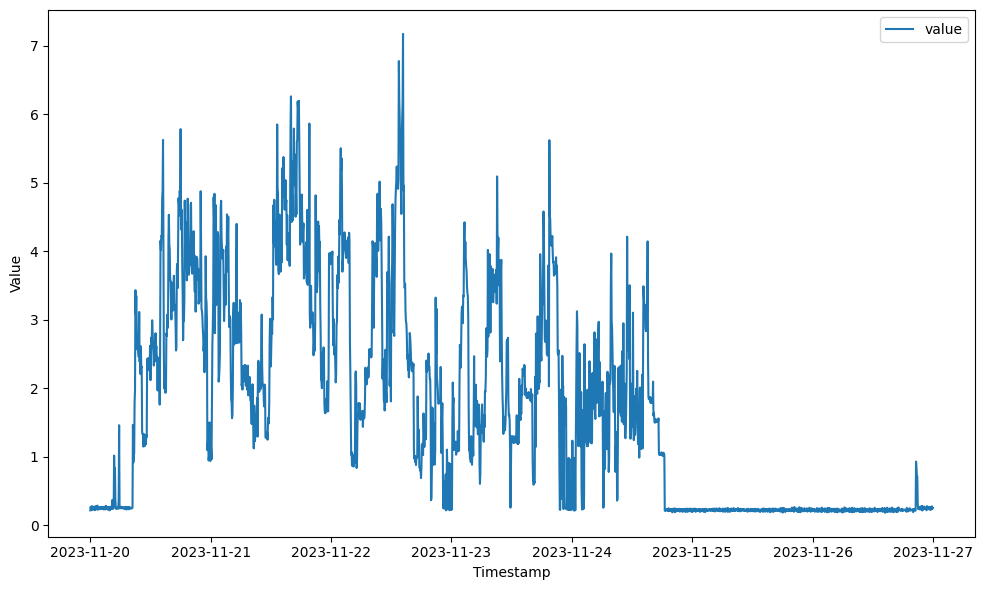

Fold n.2 evaluation result plot:


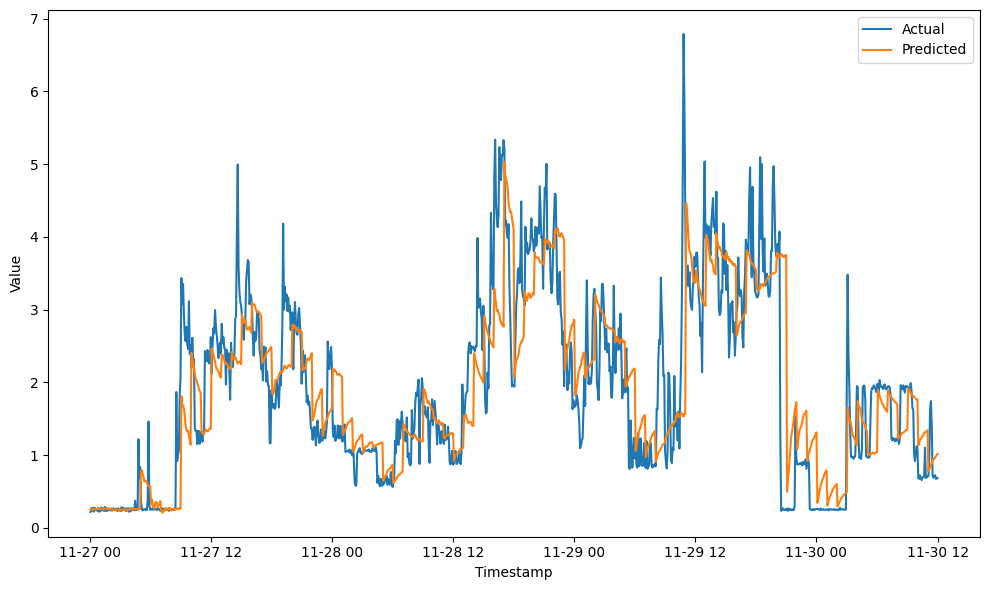

-----------------------------------------

** FOLD n.3 **
Training dataset plot:


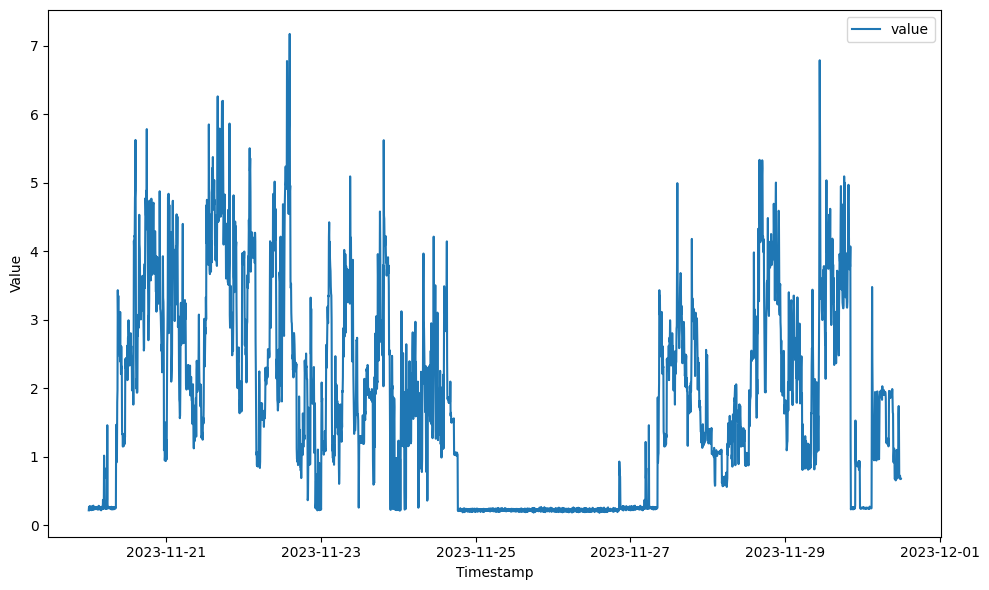

Fold n.3 evaluation result plot:


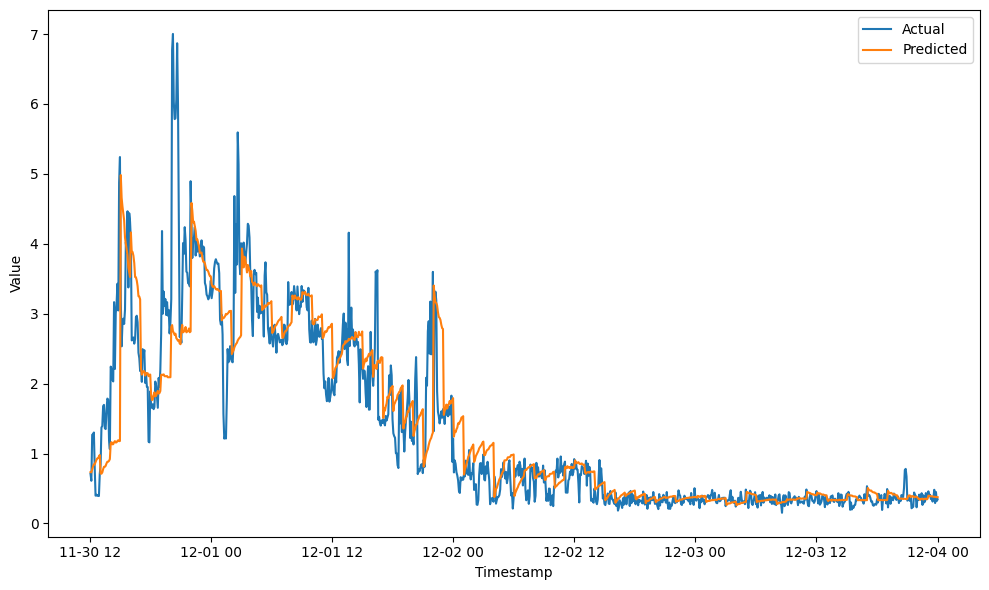

-----------------------------------------



In [11]:
from ts_cross_validation import arima_eval_ts_cross_validation


arima_evals_df = arima_eval_ts_cross_validation(
    arima_model,
    dataset.copy(),
    enable_plotting=enable_plotting,
    n_splits=n_splits,
)

In [12]:
arima_evals_df

,rmse,mse,mape,mae,r2
Fold 1,0.548275,0.300606,28.917975,0.254459,0.686232
Fold 2,0.764815,0.584942,46.516116,0.517790,0.634982
Fold 3,0.622241,0.387184,30.573242,0.332388,0.769570


** FOLD n.1 **
Training dataset plot:


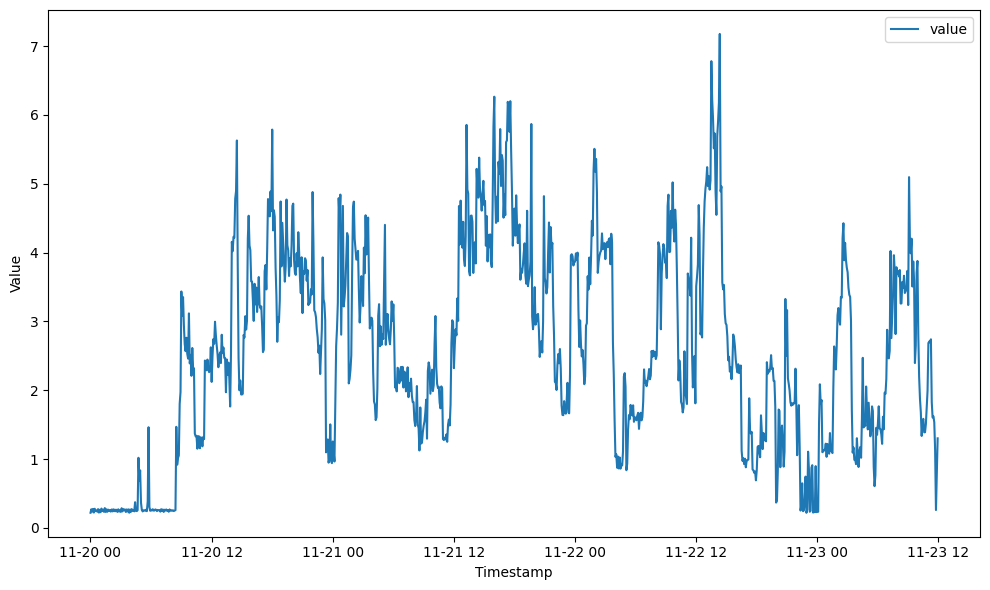

Fold n.1 evaluation result plot:


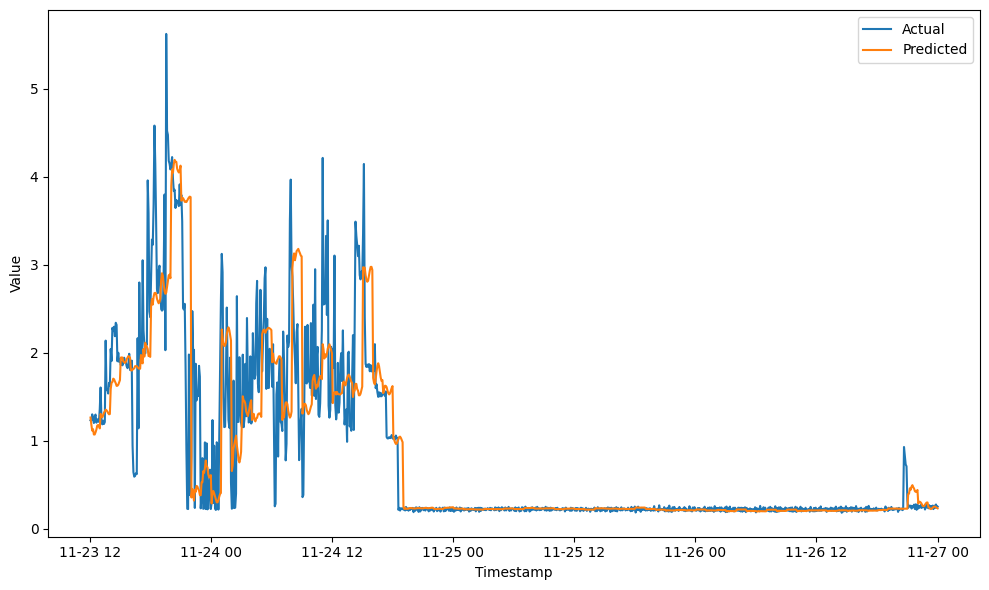

-----------------------------------------

** FOLD n.2 **
Training dataset plot:


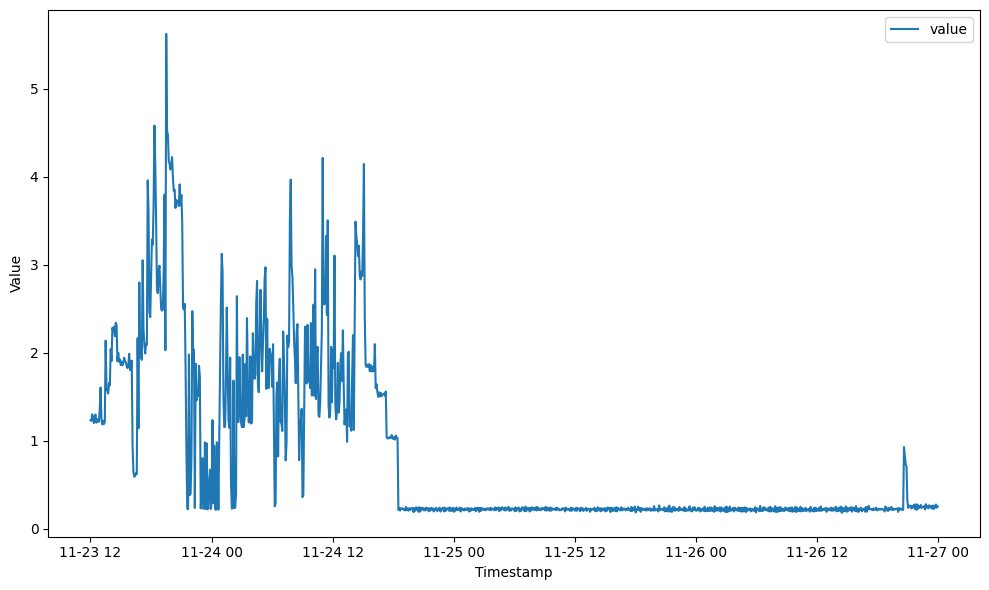

Fold n.2 evaluation result plot:


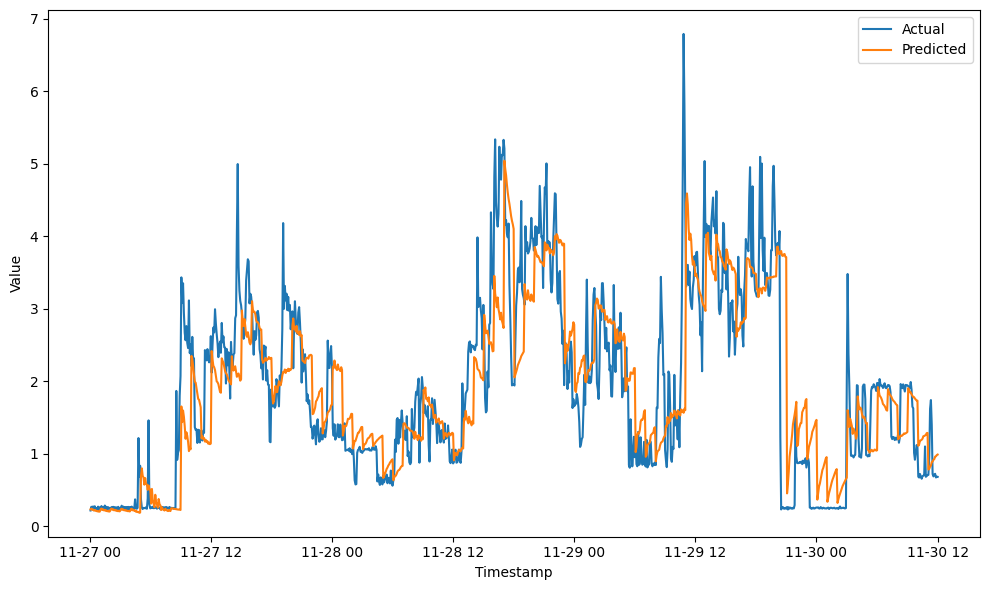

-----------------------------------------

** FOLD n.3 **
Training dataset plot:


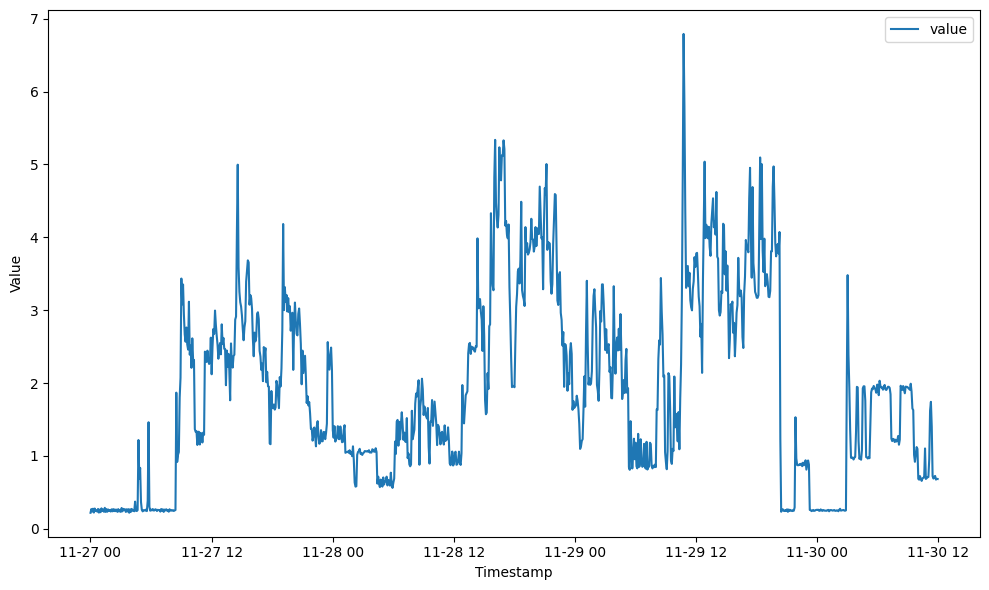

Fold n.3 evaluation result plot:


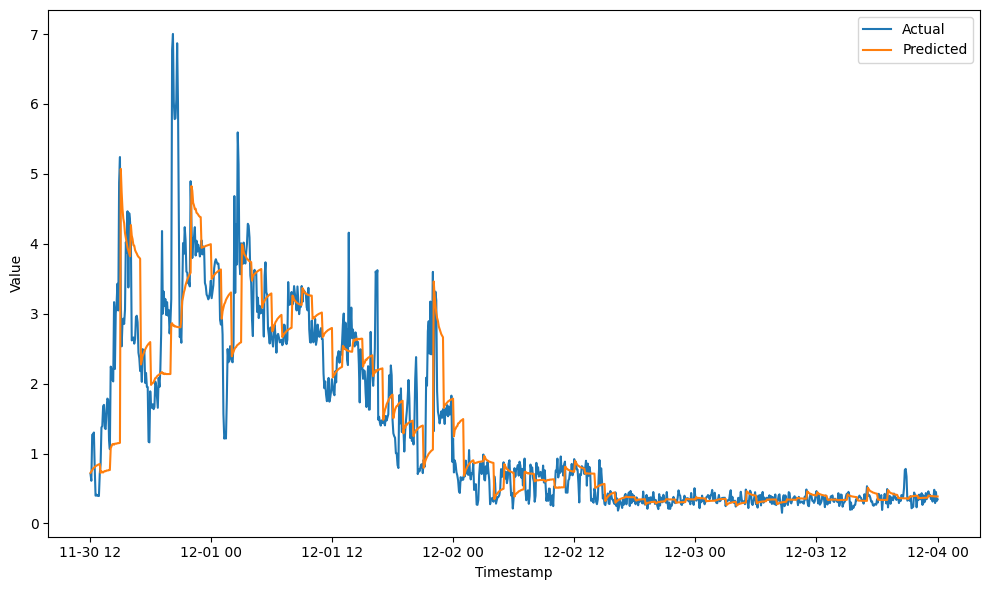

-----------------------------------------



In [13]:
from ts_cross_validation import arima_eval_rolling_ts_cross_validation


arima_rolling_evals_df = arima_eval_rolling_ts_cross_validation(
    arima_model,
    dataset.copy(),
    enable_plotting=enable_plotting,
    n_splits=n_splits,
)

In [14]:
arima_rolling_evals_df

,rmse,mse,mape,mae,r2
Fold 1,0.548275,0.300606,28.917975,0.254459,0.686232
Fold 2,0.779500,0.607620,49.202644,0.536701,0.620831
Fold 3,0.625075,0.390718,28.360152,0.333770,0.767467
